<a href="https://colab.research.google.com/github/Sk-Shakeel07/Deep-Learning-repo/blob/main/Lab_Assignment_03_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 2794 – Machine Learning Workshop 2
# LAB ASSIGNMENT-3: OPTIMIZATION AND REGULARIZATION  IN NEURAL NETWORK
## Name: SK SHAKEEL AKHTAR
## Reg. No.: 2341001063

## Section: 23412C3


# 1.Preprocessing
* Load the dataset and split it into training (80%) and testing (20%) sets.
* Standardize the features using StandardScaler.
* Perform exploratory data analysis (EDA): Plot feature distributions, correlations, or class distributions.

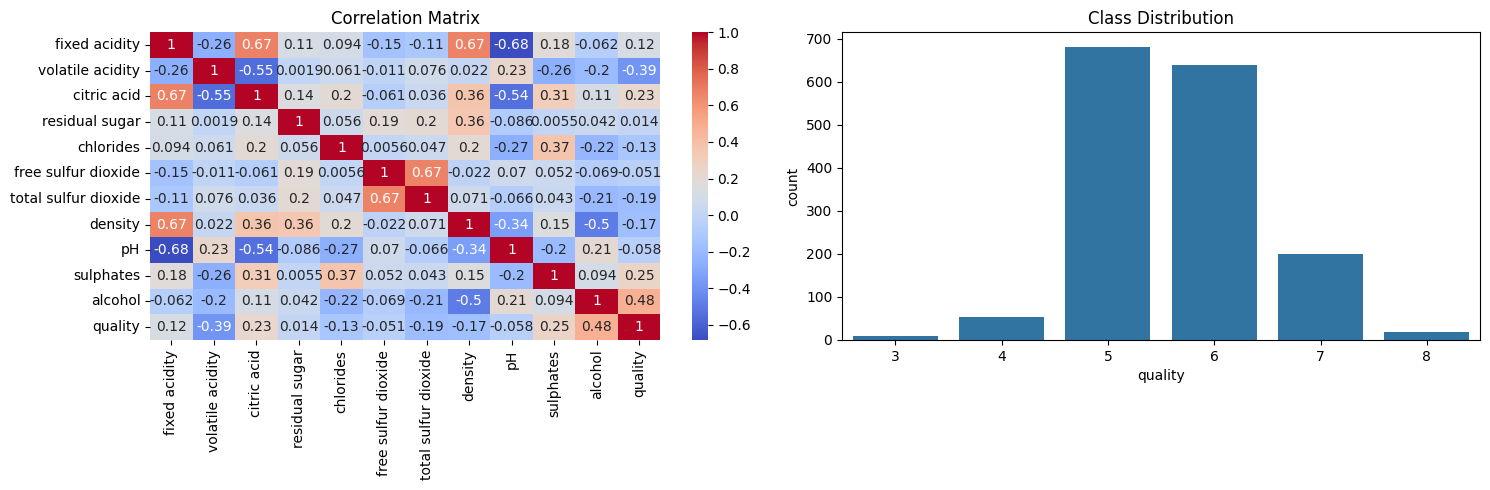

In [ ]:
#loading the data
import pandas as pd
df = pd.read_csv('winequality-red.csv', delimiter=';')

#Trainig(80%)and testing(20%)sets
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (EDA): Plot feature distributions, correlations, or class distributions.
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize for larger plots
import matplotlib.pyplot as plt
import seaborn as sns

# Correlations Matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[0]) #Specify the axes
axes[0].set_title('Correlation Matrix')

# Class Distribution
sns.countplot(x='quality', data=df, ax=axes[1]) #Specify the axes
axes[1].set_title('Class Distribution')

plt.tight_layout() #Adjust layout to prevent overlapping
plt.show()

In [ ]:
#Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#2. Build and Train an MLP Classifier
* Use tensorflow to create a multi layered fully connected model with default parameters.



In [ ]:
#Use tensorflow to create a multi layered fully connected model with default parameters.

import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (quality prediction)
])
y_train = y_train - y_train.min()
y_test = y_test - y_test.min()
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean Squared Error (MSE) for regression

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3. Build and Train an MLP Classifier
 Compile and Train the Model using Different Optimizers
* Stochastic Gradient Descent (SGD)
* Mini-batch Gradient Descent
* SGD with Momentum
* AdaGrad
* RMSprop
* ADAM

# Evaluate the Model
* Compute accuracy, precision, recall, and F1-score on the test set.
* 2. Plot the loss and accuracy vs. epochs to check for convergence.
* 3. Generate a confusion matrix and analyse misclassifications.
* 4. Compare training vs. testing accuracy to detect overfitting/underfitting.
* 5. Identify the different aspects of the model which can be modified to extract the best performance.

Optimizer: SGD
Test Loss: 1.0688, Test Accuracy: 0.5469
Optimizer: Mini-batch SGD
Test Loss: 1.1786, Test Accuracy: 0.5312
Optimizer: SGD with Momentum
Test Loss: 1.1270, Test Accuracy: 0.4719
Optimizer: AdaGrad
Test Loss: 1.0131, Test Accuracy: 0.5562
Optimizer: RMSprop
Test Loss: 1.0157, Test Accuracy: 0.5875
Optimizer: Adam
Test Loss: 1.0610, Test Accuracy: 0.5500


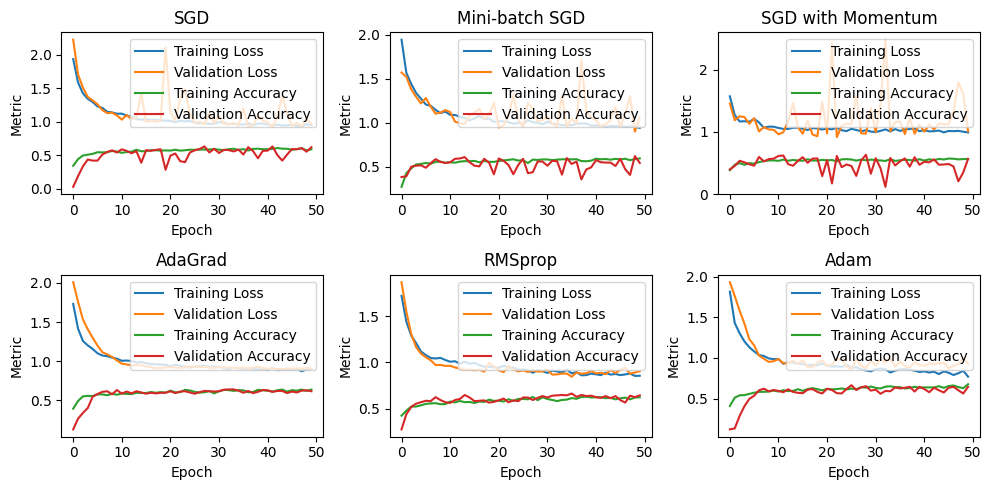

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'Mini-batch SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'SGD with Momentum': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'AdaGrad': tf.keras.optimizers.Adagrad(learning_rate=0.01),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001)
}

results = {}

# Store all history objects so that all plots can be made.
all_histories = {}

for optimizer_name, optimizer in optimizers.items():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    num_classes = len(y_train.unique())
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    results[optimizer_name] = {'loss': loss, 'accuracy': accuracy}
    all_histories[optimizer_name] = history

    print(f"Optimizer: {optimizer_name}")
    print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Plotting loss and accuracy for each optimizer
plt.figure(figsize=(10, 5))
for i, (optimizer_name, history) in enumerate(all_histories.items()):
    plt.subplot(2, 3, i + 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(optimizer_name)
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.legend()
plt.tight_layout()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


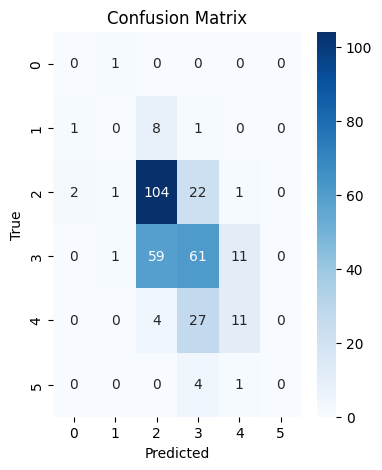

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test data using the trained model
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)  # For multi-class classification, get the class with highest probability

# Now you can create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#4. Evaluate and Compare Optimizer Performance
* Plot the training and validation accuracy for each optimizer.
* Print the final accuracy for each optimizer.
* Compare the results and build a conclusion

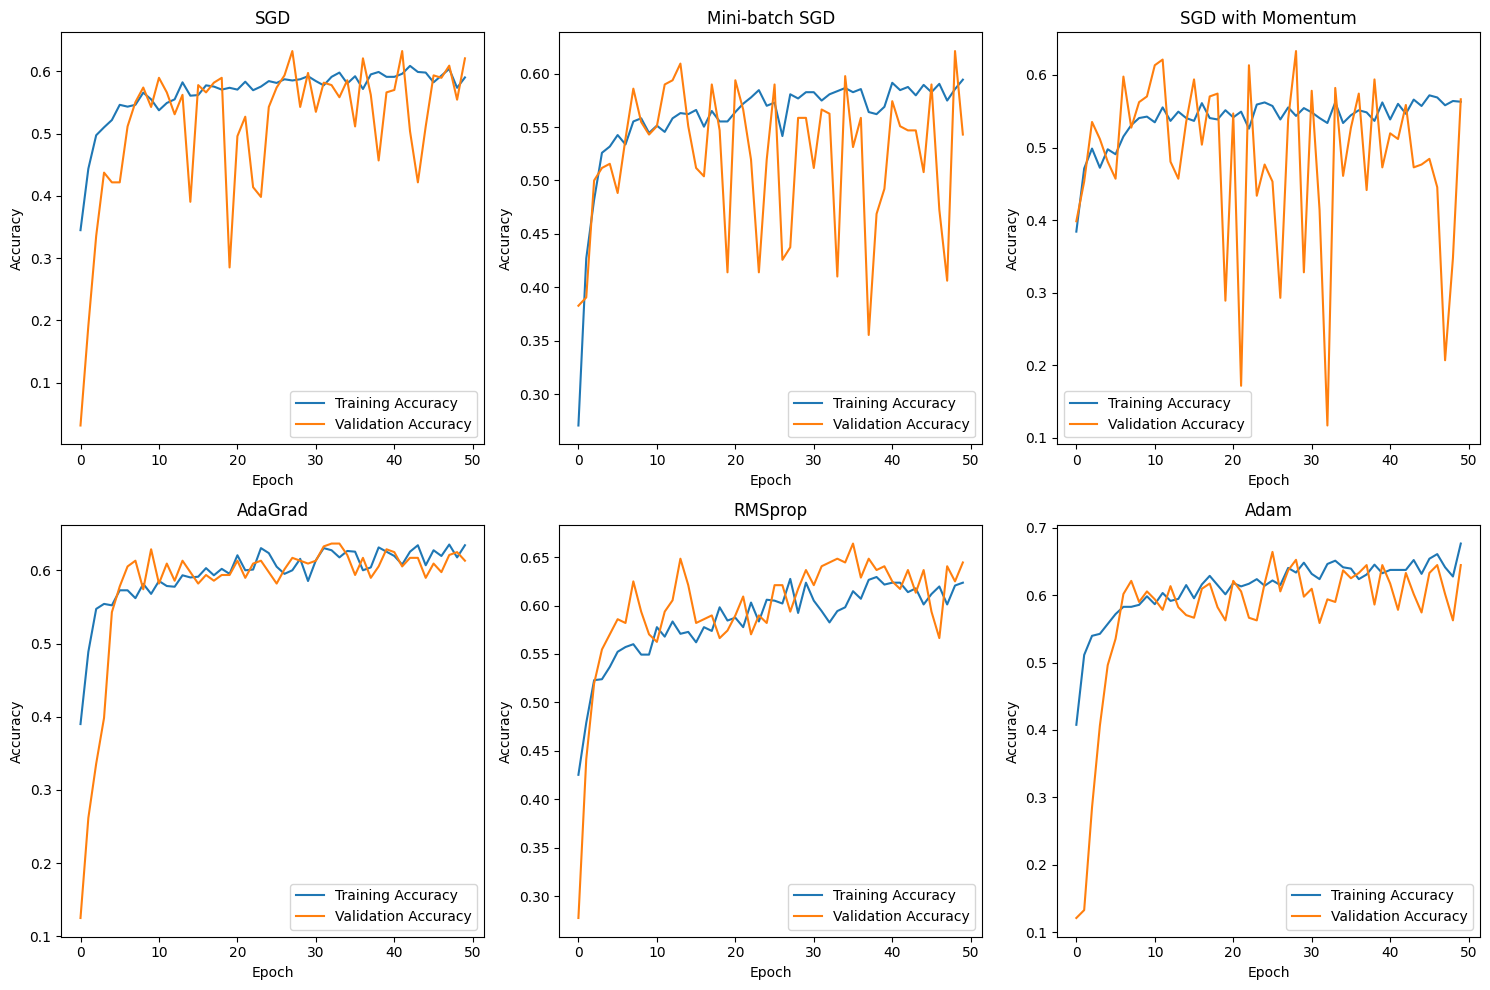

Final Accuracies:
SGD: 0.5469
Mini-batch SGD: 0.5312
SGD with Momentum: 0.4719
AdaGrad: 0.5562
RMSprop: 0.5875
Adam: 0.5500


In [ ]:
plt.figure(figsize=(15, 10))
for i, (optimizer_name, history) in enumerate(all_histories.items()):
    plt.subplot(2, 3, i + 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(optimizer_name)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
plt.tight_layout()
plt.show()

# Printing final accuracy for each optimizer
print("Final Accuracies:")
for optimizer_name, result in results.items():
    print(f"{optimizer_name}: {result['accuracy']:.4f}")
